In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

In [164]:
def data_results(testing_classes, testing_inputs, alg_class):
    cm_display = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(testing_classes, alg_class.predict(testing_inputs))
    )

    cm_display.plot()
    plt.xticks([0, 1], ["No", "Yes"])
    plt.yticks([0, 1], ["No", "Yes"])
    plt.xlabel('Predicted Entry')
    plt.ylabel('Actual Entry')
    plt.show()

    print(classification_report(testing_classes, alg_class.predict(testing_inputs)))

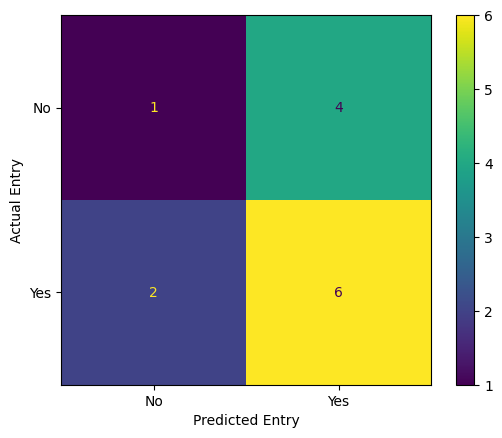

              precision    recall  f1-score   support

           N       0.33      0.20      0.25         5
           Y       0.60      0.75      0.67         8

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13



[Text(0.6630434782608695, 0.9583333333333334, 'Attacking Score <= 12.955\ngini = 0.488\nsamples = 111\nvalue = [47, 64]'),
 Text(0.45652173913043476, 0.875, 'homeW <= 11.5\ngini = 0.5\nsamples = 88\nvalue = [45, 43]'),
 Text(0.2608695652173913, 0.7916666666666666, 'Defensive Score <= 0.576\ngini = 0.487\nsamples = 62\nvalue = [36, 26]'),
 Text(0.17391304347826086, 0.7083333333333334, 'Defensive Score <= 0.301\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.13043478260869565, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21739130434782608, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.34782608695652173, 0.7083333333333334, 'Defensive Score <= 4.13\ngini = 0.463\nsamples = 55\nvalue = [35, 20]'),
 Text(0.30434782608695654, 0.625, 'Attacking Score <= 10.139\ngini = 0.44\nsamples = 52\nvalue = [35, 17]'),
 Text(0.13043478260869565, 0.5416666666666666, 'awayW <= 2.5\ngini = 0.497\nsamples = 26\nvalue = [14, 12]'),
 Text(0.08695652173913043, 0.4583333333333333

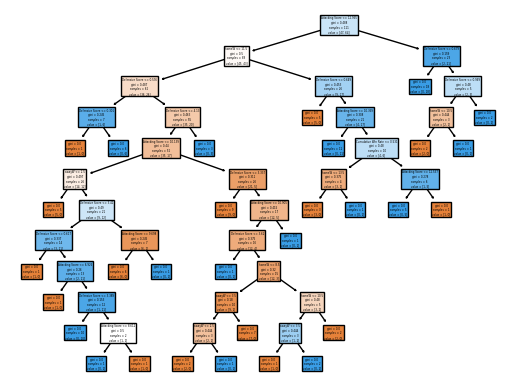

In [165]:
df_teams = pd.read_csv('dataset/processed/teams_test.csv')
df_teams = df_teams.sort_values(by=['franchID', 'year'])
df_teams['playoffNextYear'] = df_teams['playoff'].shift(-1)
df_teams.loc[df_teams['franchID'] != df_teams['franchID'].shift(-1), 'playoffNextYear'] = None
df_teams.dropna(subset=['playoffNextYear'], inplace=True)
#df_teams["confW"] = df_teams["confW"].fillna(0)
#df_teams = df_teams.fillna(-1)

label_encoder = LabelEncoder()
df_teams['playoff'] = label_encoder.fit_transform(df_teams['playoff'])

features = ['homeW', 'awayW', 'playoff', 'Attacking Score', 'Defensive Score', 'Cumulative Win Rate', 'Rookie'] # attend?

df_teams_train = df_teams[df_teams['year'] <= 8]
df_teams_test = df_teams[df_teams['year'].isin([9,10])]

# df_teams_train = df_teams[df_teams['year'] <= 5]
# df_teams_test = df_teams[df_teams['year'].isin([6])]

training_inputs = df_teams_train[features]
training_classes = df_teams_train['playoffNextYear']
testing_inputs = df_teams_test[features]
testing_classes = df_teams_test['playoffNextYear']

dt_class = DecisionTreeClassifier(random_state=42)
dt_class.fit(training_inputs, training_classes)
# print(training_inputs.isna().sum())
dt_class.predict(testing_inputs)

dt_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, dt_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, dt_class)

plot_tree(dt_class, feature_names=features, filled=True)

[[0.39 0.61]
 [0.13 0.87]
 [0.12 0.88]
 [0.75 0.25]
 [0.82 0.18]
 [0.85 0.15]
 [0.95 0.05]
 [0.82 0.18]
 [0.18 0.82]
 [0.72 0.28]
 [0.14 0.86]
 [0.79 0.21]
 [0.89 0.11]
 [0.16 0.84]
 [0.25 0.75]
 [0.15 0.85]
 [0.04 0.96]
 [0.   1.  ]
 [0.07 0.93]
 [0.89 0.11]
 [0.89 0.11]
 [0.28 0.72]
 [0.12 0.88]
 [0.02 0.98]
 [0.22 0.78]
 [0.2  0.8 ]
 [0.02 0.98]
 [0.01 0.99]
 [0.15 0.85]
 [0.17 0.83]
 [0.78 0.22]
 [0.11 0.89]
 [0.24 0.76]
 [0.75 0.25]
 [0.8  0.2 ]
 [0.83 0.17]
 [0.18 0.82]
 [0.76 0.24]
 [0.85 0.15]
 [0.16 0.84]
 [0.14 0.86]
 [0.12 0.88]
 [0.11 0.89]
 [0.02 0.98]
 [0.01 0.99]
 [0.   1.  ]
 [0.02 0.98]
 [0.1  0.9 ]
 [0.25 0.75]
 [0.67 0.33]
 [0.07 0.93]
 [0.45 0.55]
 [0.78 0.22]
 [0.91 0.09]
 [0.85 0.15]
 [0.29 0.71]
 [0.3  0.7 ]
 [0.83 0.17]
 [0.85 0.15]
 [0.78 0.22]
 [0.79 0.21]
 [0.05 0.95]
 [0.13 0.87]
 [0.77 0.23]
 [0.03 0.97]
 [0.21 0.79]
 [0.81 0.19]
 [0.14 0.86]
 [0.29 0.71]
 [0.66 0.34]
 [0.86 0.14]
 [0.82 0.18]
 [0.77 0.23]
 [0.68 0.32]
 [0.84 0.16]
 [0.19 0.81]
 [0.64 0.36]

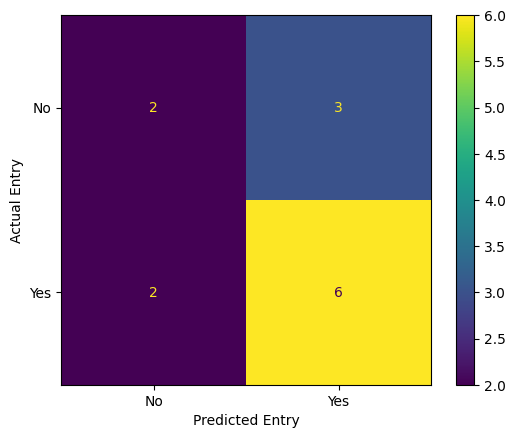

              precision    recall  f1-score   support

           N       0.50      0.40      0.44         5
           Y       0.67      0.75      0.71         8

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13



In [166]:
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(training_inputs, training_classes)

print(rf_class.predict_proba(training_inputs))

rf_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, rf_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, rf_class)

In [167]:
'''nb_class = GaussianNB()
nb_class.fit(training_inputs, training_classes)

nb_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, nb_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, nb_class)'''

'nb_class = GaussianNB()\nnb_class.fit(training_inputs, training_classes)\n\nnb_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, nb_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, nb_class)'

In [168]:
'''svm_class = SVC(kernel='rbf')
svm_class.fit(training_inputs, training_classes)

svm_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, svm_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, svm_class)'''

"svm_class = SVC(kernel='rbf')\nsvm_class.fit(training_inputs, training_classes)\n\nsvm_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, svm_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, svm_class)"

In [169]:
'''knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(training_inputs, training_classes)

knn_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, knn_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, knn_class)'''

'knn_class = KNeighborsClassifier(n_neighbors=5)\nknn_class.fit(training_inputs, training_classes)\n\nknn_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, knn_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, knn_class)'

In [170]:
'''ann_class = MLPClassifier(random_state=42, max_iter=300)
ann_class.fit(training_inputs, training_classes)

ann_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, ann_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, ann_class)'''

'ann_class = MLPClassifier(random_state=42, max_iter=300)\nann_class.fit(training_inputs, training_classes)\n\nann_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, ann_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, ann_class)'

In [171]:
'''ab_class = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)
ab_class.fit(training_inputs, training_classes)

ab_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, ab_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, ab_class)'''

'ab_class = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)\nab_class.fit(training_inputs, training_classes)\n\nab_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, ab_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, ab_class)'

In [172]:
'''for w in df_teams['confW']:
    print(w)
nan_count = df_teams['confW'].isna().sum()
print(nan_count)'''

#print(df_teams.isna().sum())

#df_teams.head(164)

df_teams_test.head(30)

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,name,...,awayL,confW,confL,min,Attacking Score,Defensive Score,coachID,Cumulative Win Rate,Rookie,playoffNextYear
0,9,ATL,ATL,EA,7,0,NaN,NaN,NaN,Atlanta Dream,...,14,2,18,6825,NaN,NaN,meadoma99w,NaN,True,Y
11,9,CHI,CHI,EA,5,0,NaN,NaN,NaN,Chicago Sky,...,13,10,10,6875,10.634197,3.499492,keyst99wc,NaN,True,N
22,9,CON,CON,EA,2,1,L,NaN,NaN,Connecticut Sun,...,9,13,7,6850,14.176532,0.658518,thibami99w,0.576726,False,N
32,9,DET,DET,EA,1,1,W,W,W,Detroit Shock,...,9,16,4,6875,15.557675,0.277947,laimbbi01w,0.652222,False,Y
51,9,IND,IND,EA,4,1,L,NaN,NaN,Indiana Fever,...,11,12,8,6950,15.445668,0.365440,dunnli99wc,0.432500,False,Y
61,9,LAS,LAS,WE,3,1,W,L,NaN,Los Angeles Sparks,...,9,12,8,7000,10.087155,3.063220,coopemi01w,0.417757,False,Y
74,9,MIN,MIN,WE,7,0,NaN,NaN,NaN,Minnesota Lynx,...,10,8,12,6900,12.438251,3.552953,zierddo99w,0.294118,False,N
84,9,NYL,NYL,EA,3,1,W,L,NaN,New York Liberty,...,9,11,9,6900,11.445218,0.449236,coylepa99w,0.436324,False,N
97,9,PHO,PHO,WE,6,0,NaN,NaN,NaN,Phoenix Mercury,...,11,8,12,6825,18.581800,0.540222,gaineco01w,NaN,True,Y
110,9,SAC,SAC,WE,4,1,L,NaN,NaN,Sacramento Monarchs,...,12,9,11,6800,12.802961,0.380909,bouceje01w,0.540541,False,N
